<a href="https://colab.research.google.com/github/ElioRame/ProgrammingAssignment2/blob/master/FinalAssignmentPALS0039_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:

with open("/content/pg74.txt") as TomSawyer:
  Book1 = TomSawyer.readlines()
with open("/content/pg84.txt") as Frankenstein:
  Book2 = Frankenstein.readlines()
with open("/content/pg345.txt") as Dracula:
  Book3 = Dracula.readlines()
with open("/content/pg1342.txt") as PrideandPrejudice:
  Book4 = PrideandPrejudice.readlines()
with open("/content/pg1727.txt") as Odissey:
  Book5 = Odissey.readlines()
with open("/content/pg2701.txt") as MobyDick:
  Book6 = MobyDick.readlines()
with open("/content/pg3207.txt") as Leviathan:
  Book7 = Leviathan.readlines()

data = Book1 + Book2 + Book3 + Book4 + Book6 + Book7
print(data[:50])

['\ufeffThe Project Gutenberg eBook of The Adventures of Tom Sawyer, Complete\n', '    \n', 'This ebook is for the use of anyone anywhere in the United States and\n', 'most other parts of the world at no cost and with almost no restrictions\n', 'whatsoever. You may copy it, give it away or re-use it under the terms\n', 'of the Project Gutenberg License included with this ebook or online\n', 'at www.gutenberg.org. If you are not located in the United States,\n', 'you will have to check the laws of the country where you are located\n', 'before using this eBook.\n', '\n', 'Title: The Adventures of Tom Sawyer, Complete\n', '\n', 'Author: Mark Twain\n', '\n', 'Release date: July 1, 2004 [eBook #74]\n', '                Most recently updated: August 9, 2023\n', '\n', 'Language: English\n', '\n', 'Credits: David Widger\n', '\n', '\n', '*** START OF THE PROJECT GUTENBERG EBOOK THE ADVENTURES OF TOM SAWYER, COMPLETE ***\n', '\n', '\n', '\n', '\n', 'THE ADVENTURES OF TOM SAWYER\n', '\n', '\n', '

In [187]:
!pip install -U nltk>=3.7.0

import nltk
nltk.download("reuters")
nltk.download("punkt")
nltk.download('punkt_tab')
from nltk.corpus import reuters
from nltk.lm import Vocabulary
from nltk.util import pad_sequence, ngrams
from nltk.tokenize import RegexpTokenizer
from nltk.lm.preprocessing import flatten
from nltk.lm.models import Laplace

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import regex as re

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Embedding, Flatten, LSTM, TimeDistributed
from tensorflow.keras.preprocessing.text import Tokenizer
token = Tokenizer()
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping


[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [193]:
import string
import collections
import operator


letters = []
padded_letters = []

for text in data:
  lower_text = [word.lower() for word in text]
  for words in lower_text:
   tokenizer = RegexpTokenizer(r'\w+')
   tokenised_word = tokenizer.tokenize(words)
   for word in tokenised_word:
    for letter in word:
      letters.append(letter)



   #for punct in string.punctuation:
    #letters = list(map(lambda x: " " if x == punct else x, tokenised_word))
     #for punct in string.punctuation:
      #text_punct = list(map(lambda x: " " if x == punct else x, letter))
      #letters.append(letter)



#def tokenize(text):
  #text_lower = [word.lower() for word in str(text)]
  #for punct in string.punctuation:
    #text_punct = list(map(lambda x: " " if x == punct else x, text_lower))
  #return text_punct

#tokenized_data = tokenize(data)
#for words in tokenized_data:
  #for letter in words:
    #letters.append(letter)





padded_lower_s = list(pad_sequence(letters,
                                     n=2,
                                     pad_left=True,
                                     left_pad_symbol="<s>",
                                     pad_right=True,
                                     right_pad_symbol="</s>"))
padded_letters.append(padded_lower_s)


# 2. Flatten and create finite vocabulary
corpus = list(flatten(padded_letters))




vocab = Vocabulary(corpus, unk_cutoff=50)

# 3. Partition into train and test
test_letters = corpus[:100000]
train_letters = corpus[100000:]

#Inspect
print("Length of corpus:", len(corpus))
print("Length of vocabulary:", len(vocab))
print("Unique words in corpus:", len(set(corpus)))

show_vocab = [i for i in vocab]
print(show_vocab)

Length of corpus: 3845425
Length of vocabulary: 39
Unique words in corpus: 59
['t', 'h', 'e', 'p', 'r', 'o', 'j', 'c', 'g', 'u', 'n', 'b', 'k', 'f', 'a', 'd', 'v', 's', 'm', 'w', 'y', 'l', 'i', '1', '2', '0', '4', '7', '9', '3', 'z', 'x', 'q', '8', '6', '_', '5', 'æ', '<UNK>']


In [194]:
#Create mapping
letter_to_index = {l: i for i, l in enumerate(vocab)}
# if vocab = abcdefg
#word_to_index = a : 1, b: 2, c:3, ...
#map data to index in the voab so that cab = [3, 1, 2]
#do it for both test and train data
#Map data
train_indices = [letter_to_index[vocab.lookup(l)] for l in train_letters]
test_indices = [letter_to_index[vocab.lookup(l)] for l in test_letters]

#Inspect
print(train_indices[:25])
print(test_indices[:25])




[5, 18, 22, 10, 8, 11, 14, 7, 12, 0, 5, 0, 1, 22, 17, 0, 5, 19, 10, 14, 10, 20, 18, 5, 4]
[38, 0, 1, 2, 3, 4, 5, 6, 2, 7, 0, 8, 9, 0, 2, 10, 11, 2, 4, 8, 2, 11, 5, 5, 12]


In [197]:
seqlen = 500

def prepare_sequences(letters, unk_index, seqlen=seqlen):
  trunc_length = len(letters) % seqlen
  X = np.array(letters)[trunc_length:].reshape((-1, seqlen))
  y = np.array(letters + [unk_index])[trunc_length + 1:].reshape((-1, seqlen))
  return X, y

Xtrain, ytrain = prepare_sequences(train_indices, letter_to_index["<UNK>"])
Xtest, ytest = prepare_sequences(test_indices, letter_to_index["<UNK>"])

#Inspect
print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)



(7490, 500) (7490, 500)
(200, 500) (200, 500)


In [199]:
def perplexity(y_true, y_pred):
  cross_entropy = tf.losses.sparse_categorical_crossentropy(y_true, y_pred)
  perplexity = tf.exp(tf.reduce_mean(cross_entropy))
  return perplexity

def build_model(input_width=len(vocab), input_length=seqlen, output_width=len(vocab), learning_rate=0.01):
  model = Sequential()
  model.add(Embedding(input_dim=input_width, output_dim=64, input_length=input_length))
  model.add(LSTM(32, return_sequences=True, activation='tanh'))
  model.add(LSTM(32, return_sequences=True, activation='tanh'))
  model.add(Dense(42, activation='tanh'))
  model.add(TimeDistributed(Dense(output_width, activation='softmax')));
  model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=[perplexity])
  return model

model = build_model()

#Inspect
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ ?                      │   0 (unbuilt) │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
training_info = model.fit(Xtrain,ytrain, batch_size=64, validation_split=0.10, epochs=200, callbacks=EarlyStopping(monitor="val_loss", patience=5))

Epoch 1/60
108/108 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - loss: 2.9151 - perplexity: 19.4861 - val_loss: 2.4835 - val_perplexity: 11.9909
Epoch 2/60
108/108 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - loss: 2.4816 - perplexity: 11.9689 - val_loss: 2.3289 - val_perplexity: 10.2716
Epoch 3/60
108/108 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - loss: 2.3467 - perplexity: 10.4540 - val_loss: 2.2420 - val_perplexity: 9.4157
Epoch 4/60
108/108 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - loss: 2.2663 - perplexity: 9.6455 - val_loss: 2.1763 - val_perplexity: 8.8171
Epoch 5/60
108/108 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - loss: 2.2156 - perplexity: 9.1673 - val_loss: 2.1407 - val_perplexity: 8.5077
Epoch 6/60
108/108 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - loss: 2.1804 - perplexity: 8.8501 - val_loss: 2.1182 - val_perplexity: 8.3182
Epoch 7/60
108/108 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - loss: 2.1544 - perplexity: 8.6234 - val_loss: 2.0902 - val_perplexity: 8.0888
Epoch 8/60
108/108 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - loss: 2.1

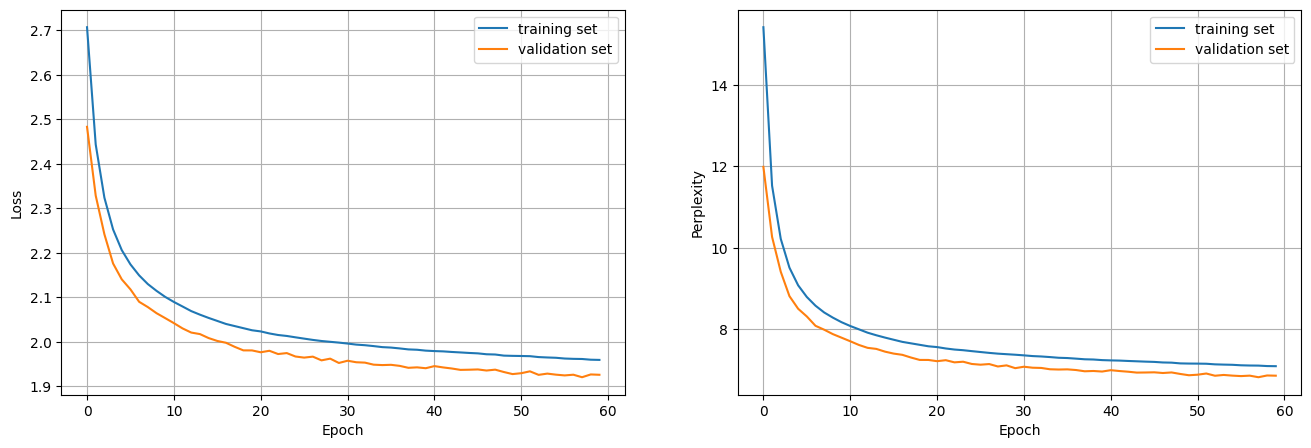

In [18]:
def plot_training_history(training_info):
  fig, axs = plt.subplots(1, 2, figsize=(16, 5))
  axs[0].plot(training_info.history['loss'], label="training set")
  axs[0].plot(training_info.history['val_loss'], label="validation set")
  axs[0].set_xlabel("Epoch")
  axs[0].set_ylabel("Loss")
  axs[0].grid(True)
  axs[0].legend()
  try:
    axs[1].plot(training_info.history['perplexity'], label="training set")
    axs[1].plot(training_info.history['val_perplexity'], label="validation set")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Perplexity")
    axs[1].grid(True)
    axs[1].legend()
  except:
    pass
  plt.show()

plot_training_history(training_info)

In [19]:
test_loss, test_perplexity = model.evaluate(Xtest, ytest, verbose=0)
print("Test loss:", test_loss)
print("Test perplexity:", test_perplexity)

Test loss: 2.1395676136016846
Test perplexity: 8.495763778686523


In [177]:

#Map indexes stored through word_to_index() back to their original form
index_to_letter = {i: l for l, i in letter_to_index.items()}

# Choose seed text and create padded index sequence
seed_text = "it is a truth universally acknowledged"
next_letters = 30
sequence = []
#for w in seed_text.split():
   #for letters in w:
     #seq = [word_to_index[letters] for letters in w.lower()]
#padded_seq = pad_sequences([seq], maxlen=seqlen, padding='post')
for text in seed_text:
  lower_t = [word.lower() for word in seed_text]
  for words in lower_t:
   tokenizer = RegexpTokenizer(r'\w+')
   token_word = tokenizer.tokenize(words)
   for word in token_word:
    for letter in word:
      sequence.append(letter_to_index[letter])

padded_seq = pad_sequences([sequence], maxlen = len(sequence), padding = "post")
# Sample word sequence
for i in range(next_letters):
  full_prediction = model.predict(padded_seq, verbose=0)
  next_three_letters = full_prediction[0][len(padded_seq) + i]
  #dpd = rv_discrete(values=(list(range(len(next_three_letters))), next_three_letters))
  #padded_seq[0][len(padded_seq) + i] = dpd.rvs(size=1)

  prediction = index_to_letter[np.argmax(next_three_letters)]
  seed_text += prediction


# Print word sequence
#sampled_words = []
#for word_index in padded_seq[0]:
  #sampled_words.append(index_to_word[word_index])
  #for i in range(next_letters):
    #seed_text += str(sampled_words)
print("Next_three_letters:", seed_text)

Next_three_letters: it is a truth universally acknowledgedistnieetestteritnltonteownedge


The present notebook makes use of six out of the seven texts made available for this assignment; namely: "The Adventures of Tom Sawyer" (Book 1), "Frankenstein" (Book 2), "Dracula" (Book 3), "Pride and Prejudice"(Book 4), "Moby Dick" (Book 6), and "Leviathan" (Book 7). Given the nature of the assignment - which required to build a language model able to predict the next three letters in a given English seed text - "The Odissey" (Book 5) was excluded because of the presence of Ancient Greek alphabet. While the complete exclusion of the text can be justified, a better result would have been achievable by the removal of letters that are not part of the English alphabet from the tokenized text during data preparation; this would have made it possible to add more data to the corpus while training the model on English sequences only. However, because the other texts provided a corpus of length 3845425, the data provided by the other six books was here considered enough to construct a meaningful model without the added presence of Book 5.

The text was first tokenised at the word level, with punctuation, newlines, and spaces being excluded. A single flattened list was then created with each letter from the corpus forming a separate item. The sequence was padded, so as to inform the model of the start and end of the corpus. A vocabulary was created using the NLTK library with a cut-off argument of 50. This constructed the input of the language model by creating an object that contained every letter that was present more than 50 times thoughout the corpus. A high cut-off frequency was chosen so as to exclude other elements from the text as the trainable input, such as numbers and unknown, without excluding them from the corpus. An index was then created so as to obtain a numerical equivalent of the items in the list based on their position in the vocabulary. The creation of this index was ... . Analysis of the corpus revealed a vocabulary set of ..., while the total length of unique letters in the text is ... .Finally the list was separated into a training set, which comprised all the letters in the corpus apart of the first 10000, which were selected to be used for the test set.

